# Kernel PCA

---

## Exercise 1

Use the `kPCA_data_2024.txt` and `kPCA_labels_2024.txt` uploaded in the Datasets folder. The first file contains the variables describing the data, while the second one contains the labels of the classes associated to it.

- Visualize and explore the data, how many dimension it has? If you plot the first two dimensions what you see?
- Apply your own implementation of PCA to the dataset and plot the eigenvalue spectrum.
- Project the data in the first two principal components and color by class.
- Implement your own version of Kernel PCA.
- Apply Kernel PCA to the dataset. Test both a Gaussian kernel with width $\sigma \in [0.05, 2.0]$ and a polynomial kernel varying the value of $\delta \in N$.
- Plot the transformed data in 2d and 3d for the different kernels.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ul_tools import algorithms, plots

Let's begin by exploring our dataset:

In [164]:
# Loading the data
df_data = pd.read_table('../Datasets/kPCA_data_2024.txt', sep=" ", header=None)
df_labels = pd.read_table('../Datasets/kPCA_labels_2024.txt', header=None)

df_data

0         1         2         3         4         5         6   \
0     0.048440 -0.605728 -0.806455 -0.089039 -0.173785  2.076301  0.313622   
1    -0.295462 -0.022271 -0.156778 -0.186206  1.065956 -0.109448  0.660369   
2     0.907188 -0.641413  0.376778 -0.059500  0.579425 -0.771757  0.400979   
3     0.780795  0.290714  0.536952  0.029201 -0.072487  0.435681 -0.570775   
4     0.441323 -0.433679  0.067781 -0.621546  0.419723 -0.957915  0.338285   
...        ...       ...       ...       ...       ...       ...       ...   
6627  0.100785 -0.517516 -0.378109 -0.211102  0.280639  1.514258 -0.327678   
6628 -0.012689 -0.450852  1.026652 -0.062412 -0.428402  0.020070 -0.943761   
6629  0.152809 -0.089301 -0.555176 -0.138393  0.317464  0.231431 -0.073481   
6630 -0.344117 -1.174488  0.426128 -0.818683 -0.294348  1.349895  1.112391   
6631 -0.228292  0.214554 -0.138154  0.456719 -0.158664  0.217842 -1.225577   

            7         8         9         10        11        12        13  \
0    -0.060463  0.058880  0.221737  0.139304  0.030232  0.077055  0.910828   
1    -0.337726  1.062067 -0.201562  0.512837 -1.074720  0.499960 -0.328338   
2     0.096620  0.000697  1.569824 -0.628336  0.094161  0.959419  0.047134   
3     0.804292 -0.429733 -1.330242  0.408977  0.434869  0.020344 -0.692591   
4     0.014053 -0.010859  0.756259 -0.514746 -0.027585  0.959982  0.001654   
...        ...       ...       ...       ...       ...       ...       ...   
6627 -0.542136 -0.270337 -0.425826  0.476004 -0.833673  0.216126  0.455684   
6628 -0.472199  0.316988  0.446661  0.707163 -0.694150  1.197871 -1.035908   
6629 -1.294680  1.317530 -0.633273  0.193126  0.853288  1.031373  0.283991   
6630 -0.058259  0.843715  0.164078 -0.006022  0.074031  0.653718  0.138246   
6631 -0.698611 -0.698286 -0.821317  0.371864 -0.356964 -0.056457  0.148930   

            14        15        16        17        18        19  
0    -0.005463 -0.748908 -0.472695 -0.372555  0.265450  0.495448  
1    -0.046867 -0.322455 -0.268781 -0.601436  1.261508 -0.976030  
2    -0.527203 -0.117238 -0.699726  0.442404  0.395835 -0.600845  
3    -0.448373  0.550437  0.655933  0.739303 -0.415398 -0.784031  
4    -0.548821 -0.119099 -0.802109  1.094712 -1.142502  0.702591  
...        ...       ...       ...       ...       ...       ...  
6627 -0.144926 -0.289163  0.312681 -0.653066  0.478604  0.871552  
6628 -0.852783 -0.527604  0.324899 -0.014423  0.026604  0.558198  
6629  0.244358 -0.089771 -0.127971 -0.431149  0.213306  0.238338  
6630  1.017829 -0.423736 -0.600297  0.044359 -0.016208 -0.520719  
6631  0.429294  0.267269  0.600030 -0.044330  0.497779  0.532321  

[6632 rows x 20 columns]

In [165]:
# Different labels
labels = df_labels[0].values
unique_labels = np.unique(labels)
print("Unique labels in the dataset:", unique_labels)

Unique labels in the dataset: [0 1]


Our dataset is composed of 6632 samples with 20 features each and we are dealing with a binary classification problem.

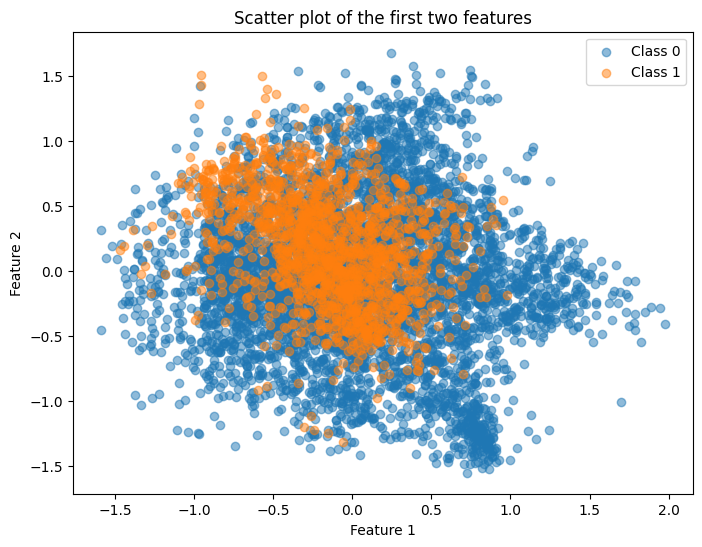

In [166]:
# Plot of the first two features of the dataset
plt.figure(figsize=(8, 6))
for label in unique_labels:
    plt.scatter(df_data[labels == label][0], df_data[labels == label][1], label=f'Class {label}', alpha=0.5)    
plt.title('Scatter plot of the first two features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

If we take a look to the plot of the two first features, we see both classes totally overlapping. They seem to be following gaussian distributions centered at zero but with different variance.

Let's try to apply PCA:

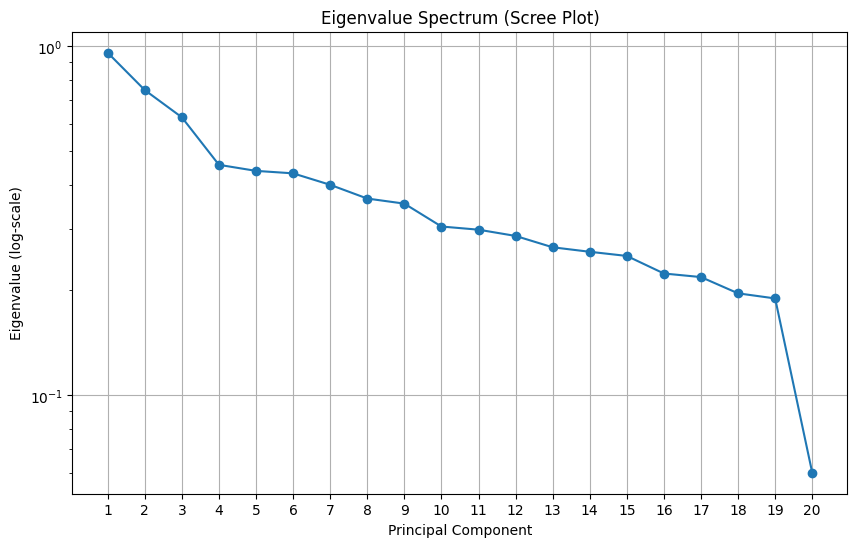

In [167]:
# PCA
projections, eigenvalues, eigenvectors = algorithms.PCA(df_data.values)

# Plot of the Eigenvalue Spectrum
plots.plot_eigenvalue_spectrum(eigenvalues)

According to the plot of the eigenvalue spectrum, we can assume that we will need at least 4 dimensions to separate our data.

Let's plot again the data but in the main two and three principal components.

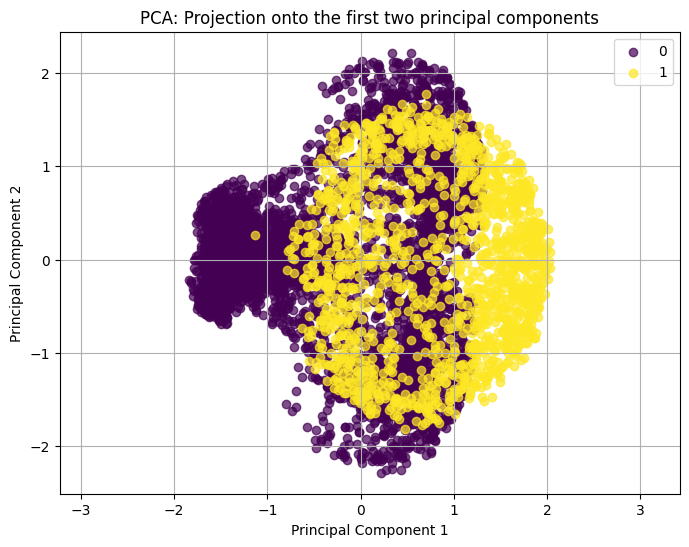

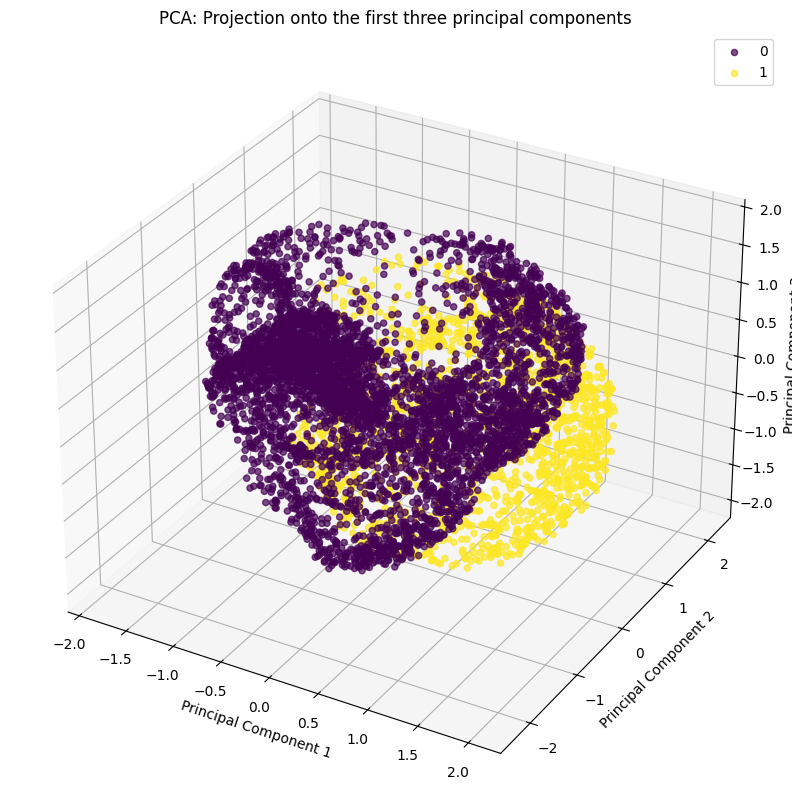

In [168]:
# Plot of 2 principal components
plots.project_principal_components(projections[:, 0], projections[:, 1], labels=labels, class_names=unique_labels, title='PCA: Projection onto the first two principal components')

# Plot of 3 principal components
plots.project_principal_components(projections[:, 0], projections[:, 1], projections[:, 2], labels=labels, class_names=unique_labels, title='PCA: Projection onto the first three principal components')

Now we start to see the different clusters, however, it is still not easy to separate them.

Time to try with Kernel PCA:

In [169]:
def kernel_PCA(x, kernel_func, degree=None, sigma=None, n_components=None):

    # Kernel matrix computation
    if kernel_func == 'polynomial':
        if degree is None:
            raise ValueError("For polynomial kernel 'degree' parameter must be provided.")
        k = (x @ x.T + 1) ** degree

    elif kernel_func == 'gaussian':
        if sigma is None:
            raise ValueError("For Gaussian kernel 'sigma' parameter must be provided.")
        k = np.exp(-np.linalg.norm(x[:, np.newaxis] - x[np.newaxis, :], axis=2)**2 / (2 * sigma**2))
    
    elif kernel_func == 'linear':
        k = x @ x.T
    
    else:
        raise ValueError("Unsupported kernel function. Use 'linear', 'polynomial' or 'gaussian'.")

    # Centering the Kernel matrix
    n_samples = k.shape[0]
    one_n = np.ones((n_samples, n_samples)) / n_samples # n x n matrix with all entries equal to 1/n
    k_centered = k - one_n @ k - k @ one_n + one_n @ k @ one_n

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(k_centered)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    if n_components is not None:
        eigenvalues = eigenvalues[:n_components]
        eigenvectors = eigenvectors[:, :n_components]
        
    # Compute the projections
    projections = eigenvectors * np.sqrt(eigenvalues)
    
    return projections, eigenvalues, eigenvectors

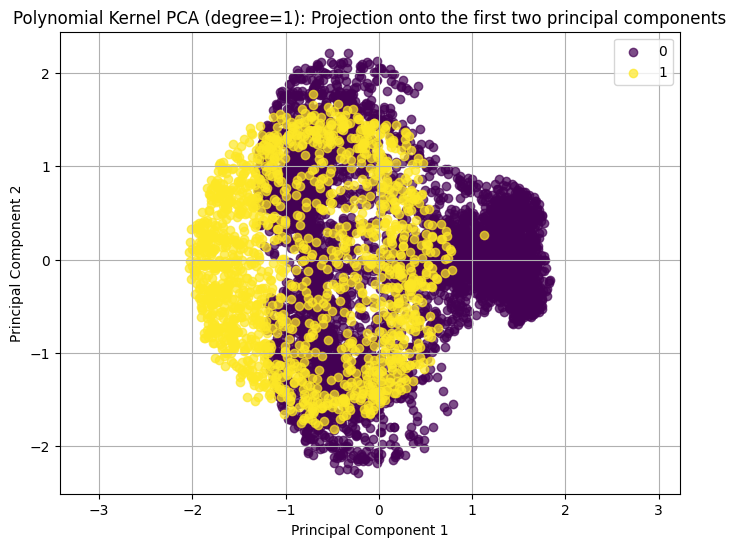

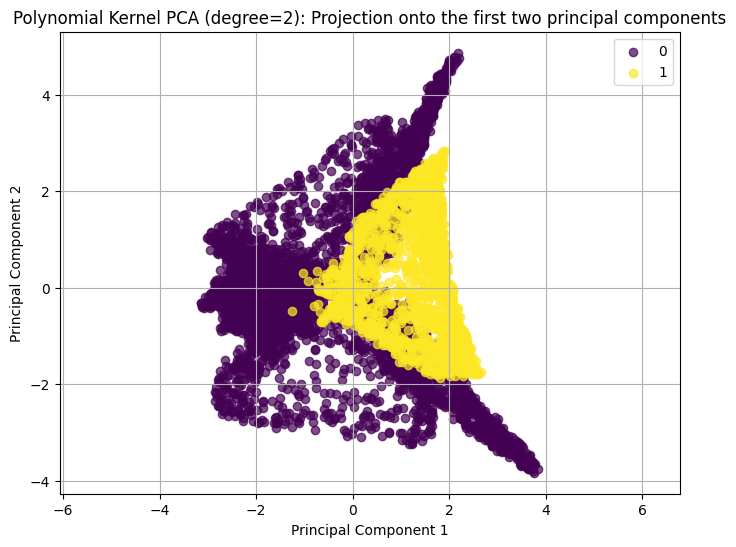

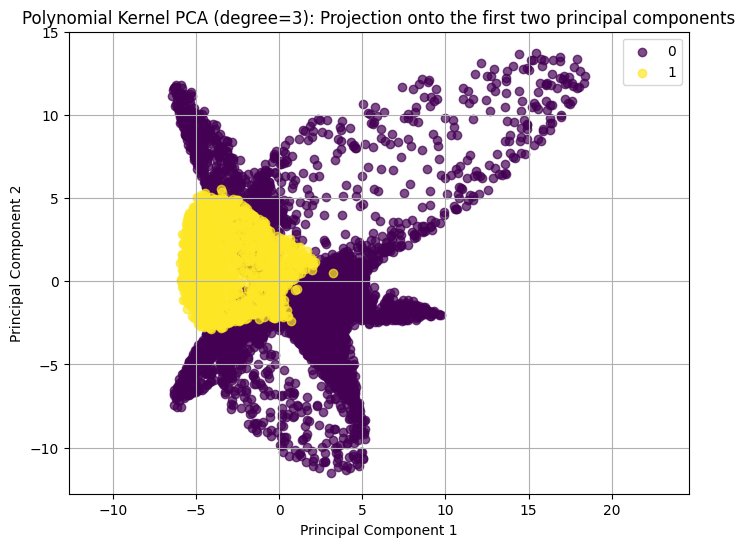

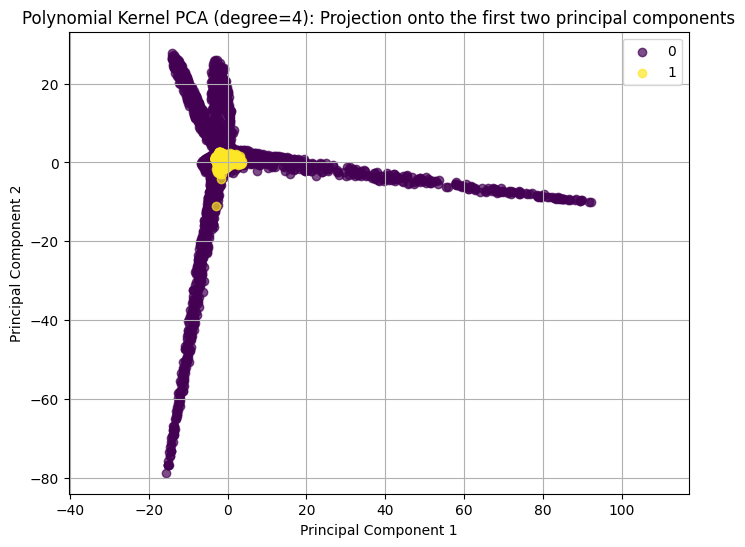

In [170]:
# Polynomial Kernel PCA with different degrees
for degree in range(1, 5):
    projections, eigenvalues_kpca, eigenvectors_kpca = kernel_PCA(df_data.values, kernel_func='polynomial', degree=degree, n_components=3)

    # plotting the first two and three principal components
    plots.project_principal_components(projections[:, 0], projections[:, 1], labels=labels, class_names=unique_labels, title=f'Polynomial Kernel PCA (degree={degree}): Projection onto the first two principal components')
    plots.project_principal_components(projections[:, 0], projections[:, 1], projections[:, 2], dynamic=True, labels=labels, class_names=unique_labels, title=f'Polynomial Kernel PCA (degree={degree}): Projection onto the first three principal components')

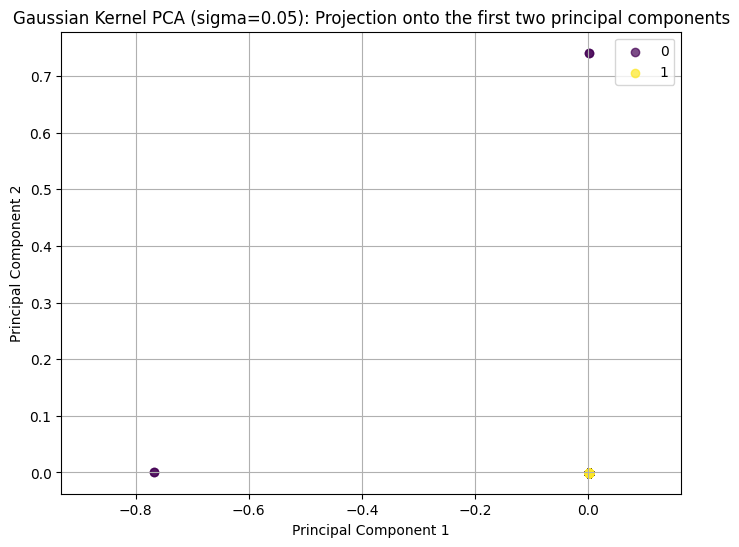

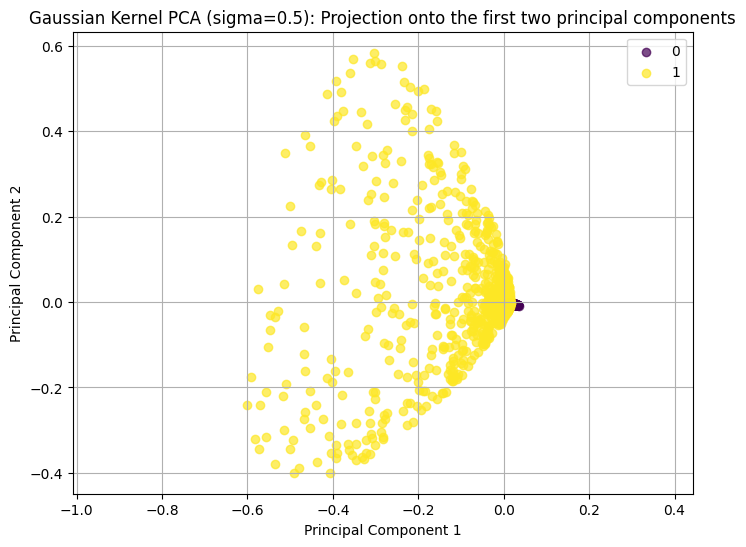

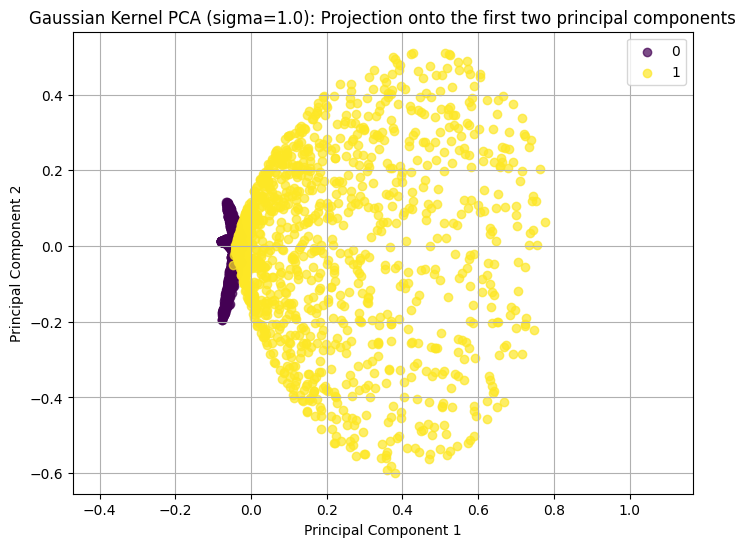

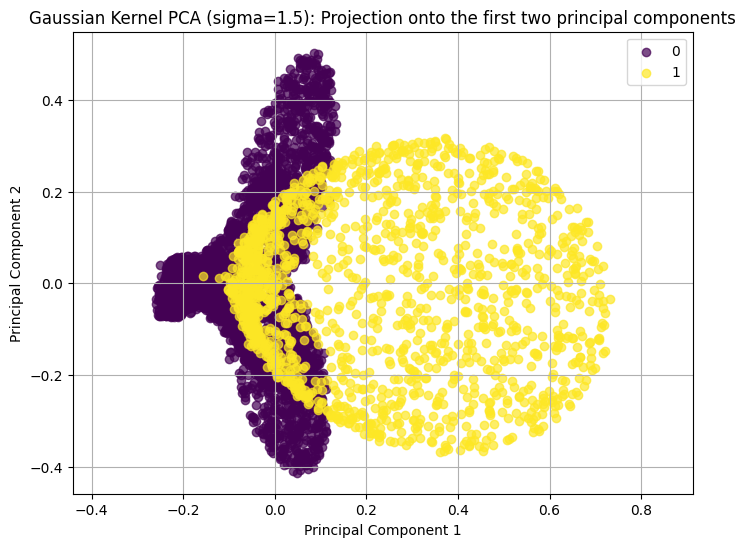

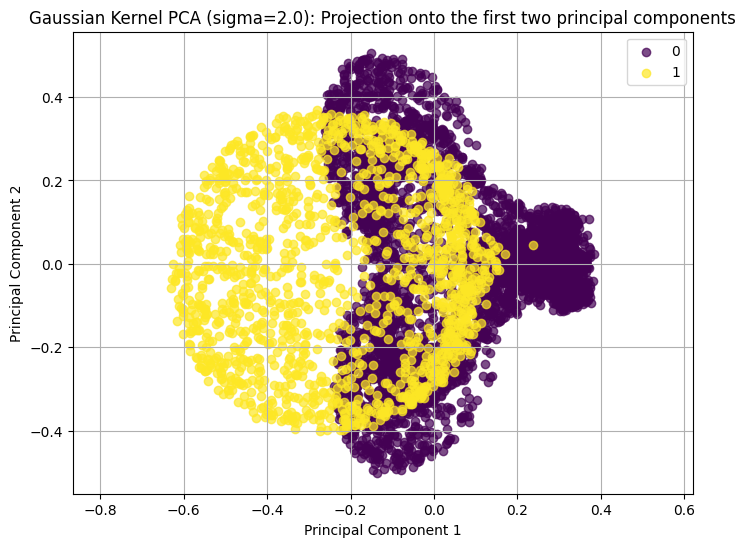

In [171]:
# Gaussian Kernel PCA with different sigmas
for sigma in [0.05, 0.5, 1.0, 1.5, 2.0]:
    projections, eigenvalues_kpca, eigenvectors_kpca = kernel_PCA(df_data.values, kernel_func='gaussian', sigma=sigma, n_components=3)

    # plotting the first two and three principal components
    plots.project_principal_components(projections[:, 0], projections[:, 1], labels=labels, class_names=unique_labels, title=f'Gaussian Kernel PCA (sigma={sigma}): Projection onto the first two principal components')
    plots.project_principal_components(projections[:, 0], projections[:, 1], projections[:, 2], dynamic=True, labels=labels, class_names=unique_labels, title=f'Gaussian Kernel PCA (sigma={sigma}): Projection onto the first three principal components')

After reviewing the results of applying kernel PCA with both polynomial (varying the degree) and gaussian (varying the variance) we can conclude that the projections which better separates the two classes are those gaussian projections with a low variance.